In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.models import  Model 
from tensorflow.keras.layers import  Input,Activation,Add
from tensorflow.keras.regularizers import  l2
from tensorflow.keras.optimizers import Adam,Adadelta,Adamax,RMSprop
from tensorflow.keras.optimizers.experimental import Adagrad

KeyboardInterrupt: 

In [3]:
import os
flies=os.listdir(fldr)

In [5]:
ages=[]
genders=[]
images=[]
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)


./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

./UTKFace/11_0_0_20170110225327724.jpg.chip.jpg
./UTKFace/11_0_0_20170110225435539.jpg.chip.jpg
./UTKFace/11_0_0_20170110225459361.jpg.chip.jpg
./UTKFace/11_0_0_20170110232511893.jpg.chip.jpg
./UTKFace/11_0_1_20170103201136230.jpg.chip.jpg
./UTKFace/11_0_2_20170103200847287.jpg.chip.jpg
./UTKFace/11_0_3_20170104013250186.jpg.chip.jpg
./UTKFace/11_0_3_20170104230222352.jpg.chip.jpg
./UTKFace/11_0_4_20170103200621488.jpg.chip.jpg
./UTKFace/11_1_0_20170103200517422.jpg.chip.jpg
./UTKFace/11_1_0_20170109203319557.jpg.chip.jpg
./UTKFace/11_1_0_20170109203327397.jpg.chip.jpg
./UTKFace/11_1_0_20170109203353740.jpg.chip.jpg
./UTKFace/11_1_0_20170109203400684.jpg.chip.jpg
./UTKFace/11_1_0_20170109203422194.jpg.chip.jpg
./UTKFace/11_1_0_20170109203919852.jpg.chip.jpg
./UTKFace/11_1_0_20170109204030951.jpg.chip.jpg
./UTKFace/11_1_0_20170109204123358.jpg.chip.jpg
./UTKFace/11_1_0_20170109204523092.jpg.chip.jpg
./UTKFace/11_1_0_20170109204546617.jpg.chip.jpg
./UTKFace/11_1_0_20170109204611305.jpg.c

In [6]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

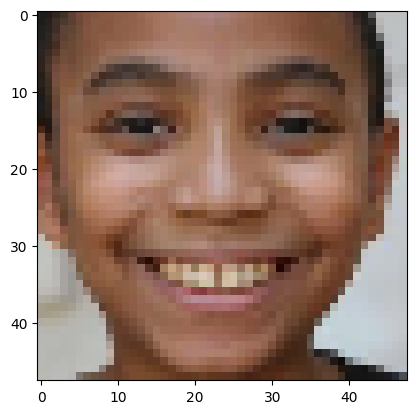

In [7]:
plt.imshow(images[87])

In [8]:
print(ages[87])

10


In [9]:
print(genders[87])

0


In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [12]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[1589 1765]


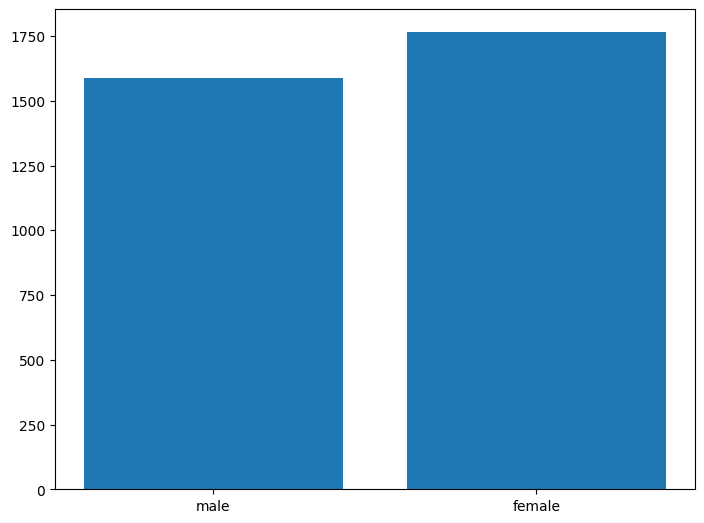

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['male','female']
values=[1589,1765]
ax.bar(gender,values)
plt.show()

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  156   65  130   81  157  177  247  158  262   98  284  346   38
   11    2    1    5    5    1    3    4]


In [15]:
val=values.tolist()
cnt=counts.tolist()

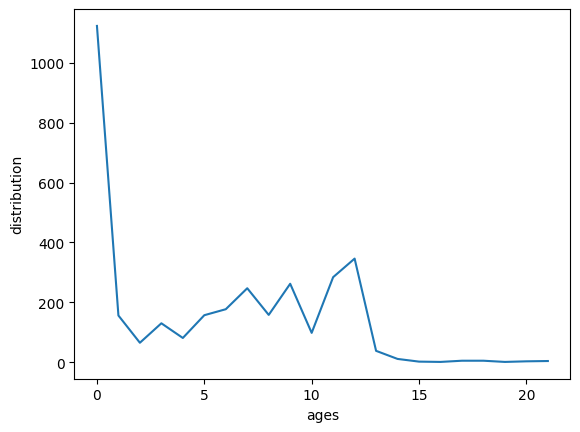

In [16]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [18]:
images_f_2=images=images_f/255

In [19]:
images_f_2.shape

(3354, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

In [21]:

from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [23]:
Y_train[0:5]

array([[19,  1],
       [18,  0],
       [ 1,  0],
       [ 1,  1],
       [21,  1]])

In [24]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[0][0:5]

array([1, 0, 0, 1, 1])

In [26]:
Y_train_2[1][0:5]

array([19, 18,  1,  1, 21])

In [27]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x 


In [28]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,356)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model


In [29]:
Model=model((48,48,3))

In [30]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
fle_s='Age_sex_detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [33]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


40/40 [==============================] - ETA: 0s - loss: 10.8460 - sex_out_loss: 0.7096 - age_out_loss: 9.8887 - sex_out_accuracy: 0.5058 - age_out_accuracy: 0.3213
Epoch 1: val_loss improved from inf to 10.12848, saving model to Age_sex_detection.h5
40/40 [==============================] - 49s 1s/step - loss: 10.8460 - sex_out_loss: 0.7096 - age_out_loss: 9.8887 - sex_out_accuracy: 0.5058 - age_out_accuracy: 0.3213 - val_loss: 10.1285 - val_sex_out_loss: 0.6859 - val_age_out_loss: 9.2390 - val_sex_out_accuracy: 0.5554 - val_age_out_accuracy: 0.3504
Epoch 2/250
40/40 [==============================] - ETA: 0s - loss: 8.5956 - sex_out_loss: 0.6917 - age_out_loss: 7.7111 - sex_out_accuracy: 0.5153 - age_out_accuracy: 0.3296
Epoch 2: val_loss improved from 10.12848 to 9.00861, saving model to Age_sex_detection.h5
40/40 [==============================] - 60s 2s/step - loss: 8.5956 - sex_out_loss: 0.6917 - age_out_loss: 7.7111 - sex_out_accuracy: 0.5153 - age_out_accuracy: 0.3296 - val_loss

In [34]:
Model.evaluate(X_test,Y_test_2)

27/27 [==============================] - 2s 59ms/step - loss: 3.9422 - sex_out_loss: 0.6176 - age_out_loss: 2.9505 - sex_out_accuracy: 0.7449 - age_out_accuracy: 0.3504


[3.9421510696411133,
 0.6175737977027893,
 2.9504597187042236,
 0.7449344396591187,
 0.3504171669483185]

In [35]:
pred=Model.predict(X_test)

27/27 [==============================] - 2s 59ms/step


In [36]:
pred[1]

array([[ 0.9999185],
       [14.961524 ],
       [14.303498 ],
       [ 0.9999185],
       [13.308887 ],
       [ 0.9999185],
       [18.37285  ],
       [ 0.9999185],
       [18.4221   ],
       [11.697752 ],
       [13.778986 ],
       [15.844952 ],
       [ 0.9999185],
       [14.508216 ],
       [17.8109   ],
       [14.262375 ],
       [15.098951 ],
       [ 0.9999185],
       [14.779999 ],
       [ 0.9999185],
       [15.918072 ],
       [14.302843 ],
       [13.443522 ],
       [ 0.9999185],
       [10.200554 ],
       [14.61914  ],
       [ 1.5707661],
       [ 0.9999185],
       [18.166317 ],
       [13.754923 ],
       [ 0.9999185],
       [ 0.9999185],
       [13.092298 ],
       [10.00455  ],
       [ 1.0059206],
       [ 0.9999185],
       [16.845074 ],
       [ 0.9999185],
       [12.4743185],
       [15.687382 ],
       [ 0.9999185],
       [18.896444 ],
       [13.514496 ],
       [16.031033 ],
       [16.507492 ],
       [14.282157 ],
       [ 8.613744 ],
       [ 0.99

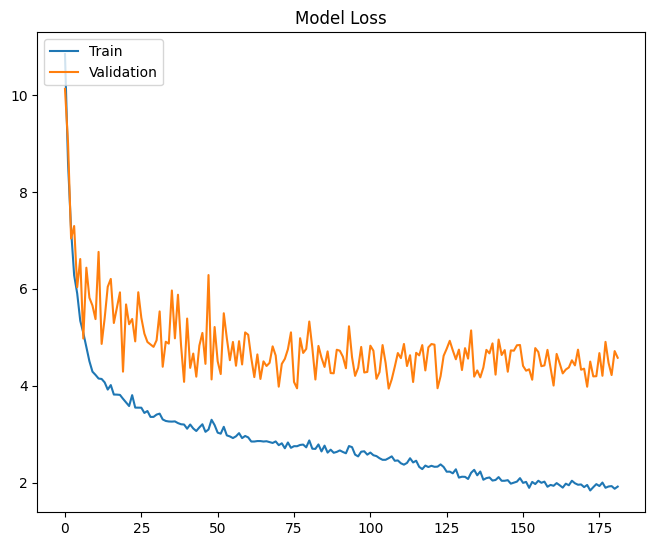

In [37]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

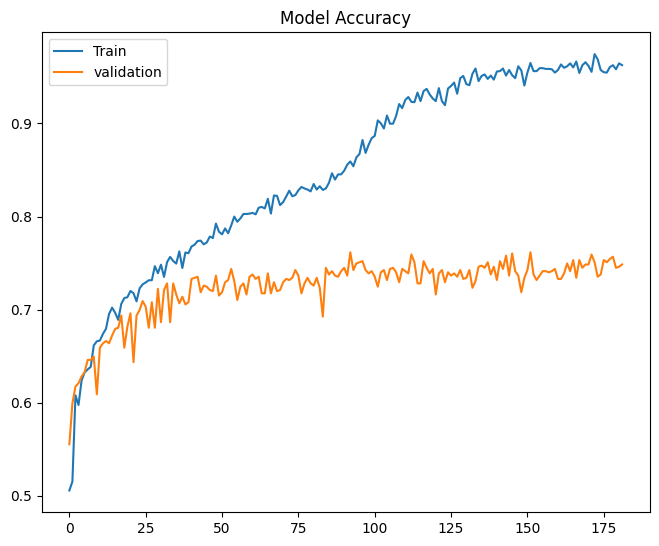

In [38]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

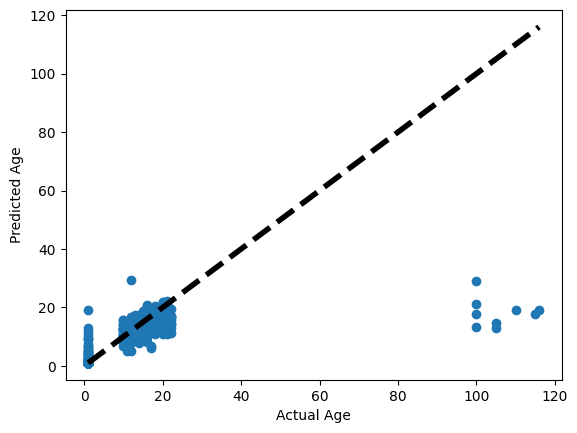

In [39]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [40]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
report=classification_report(Y_test_2[0],Pred_l)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       372
           1       0.77      0.77      0.77       467

    accuracy                           0.74       839
   macro avg       0.74      0.74      0.74       839
weighted avg       0.75      0.74      0.75       839



In [44]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

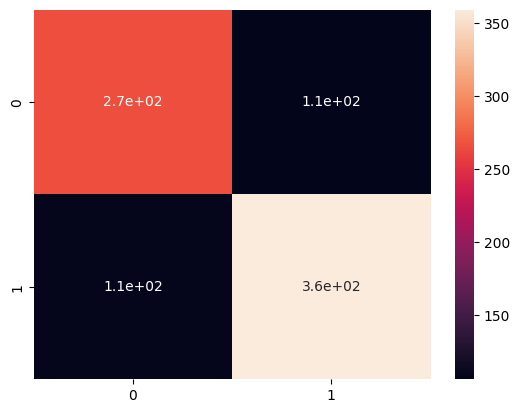

In [45]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [46]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    Pred_l=Model.predict(np.array([image_test]))
    sex_f=['male','female']
    age=int(np.round(Pred_l[1][0]))
    sex=int(np.round(Pred_l[0][0]))
    print("Predicted age is "+ str(age))
    print("Predicted gender is"+sex_f[sex])

1/1 [==============================] - 0s 33ms/step
Predicted age is 47
Predicted gender ismale


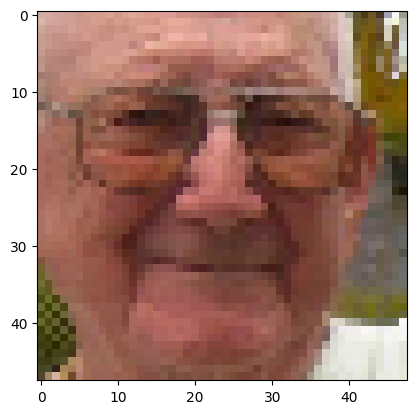

In [47]:
test_image(11,images_f,images_f_2,Model)

1/1 [==============================] - 0s 57ms/step
Predicted age is 10
Predicted gender ismale


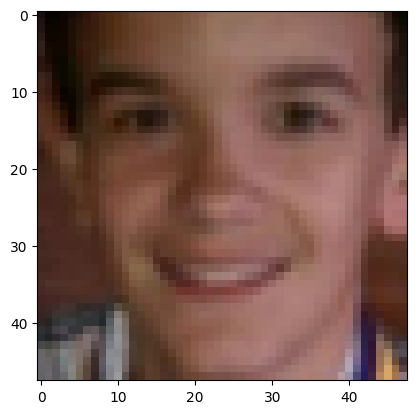

In [48]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 55ms/step
Predicted age is 9
Predicted gender isfemale


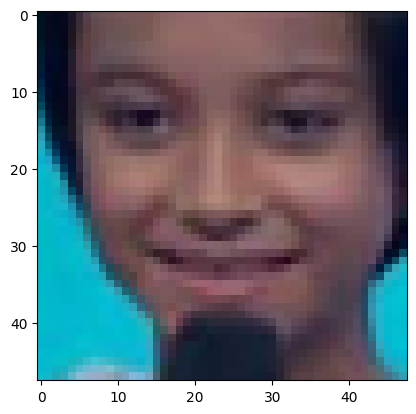

In [49]:
test_image(168,images_f,images_f_2,Model)